# **Tasa de Mortalidad Infantil de Argentina (TMI_ARG)**

**Temas:** Estadísticas Vitales

**Frecuencia de actualización:** Anual

**Unidades:** Niños

**Dataset:** Tasa de Mortalidad Infantil

**Distribución:** Tasa de Mortalidad Infantil 1990-2021

**Responsable de publicación:** Ministerio de Salud. Dirección de Estadística e Información en Salud (DEIS)

**Fecha de publicación:** 2019-04-03T13:31:16.223070

**Fecha de actualización:** 2023-05-02T01:03:59.089474

**Fuente primaria:** Dirección de Estadística e Información en Salud (DEIS). Secretaría de Gobierno de Salud Esta información proporciona detalles sobre la Tasa de Mortalidad Infantil en Argentina, incluyendo su frecuencia de actualización, el período cubierto por el dataset, el responsable de su publicación, y las fechas de publicación y actualización más recientes. La fuente primaria de estos datos es la Dirección de Estadística e Información en Salud (DEIS) de la Secretaría de Gobierno de Salud de Argentina.

**dataset:** http://datos.salud.gob.ar/dataset/2eff770c-1c2b-4a22-9281-c3b5e9412086/resource/c1253897-d507-41f7-a3e1-6ed756e7243b/download/tasa-mortalidad-infantil-deis-1990-2021.csv

In [2]:
import os
import requests
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)


class FileDownloader:
    @staticmethod
    def process(file_url: str, destination_path: str) -> bool:
        """
        Descarga un archivo desde una URL y lo guarda en la ruta especificada.

        Args:
            file_url (str): URL del archivo a descargar.
            destination_path (str): Ruta de destino donde se guardará el archivo descargado.

        Returns:
            bool: True si la descarga fue exitosa o en el caso que el archivo exista, False en caso contrario.
        """
        try:
            if os.path.exists(destination_path):
                logger.info("El archivo ya existe en la ruta de destino.")
                return True
            with requests.get(file_url) as response:
                response.raise_for_status()
                with open(destination_path, 'wb') as file:
                    file.write(response.content)
            logger.info("Descarga exitosa.")
            return True
        except FileNotFoundError as e:
            logger.error("No se pudo descargar el archivo. Archivo no encontrado en la URL proporcionada: "
                         f"{str(e)}")
        except requests.exceptions.HTTPError as e:
            logger.error(f"Error HTTP al descargar el archivo: {str(e)}")
        except requests.exceptions.ConnectionError as e:
            logger.error(f"Error de conexión al descargar el archivo: {str(e)}")
        except requests.exceptions.Timeout as e:
            logger.error(f"Tiempo de espera agotado al descargar el archivo: {str(e)}")
        except requests.exceptions.RequestException as e:
            logger.error(f"Error al realizar la solicitud HTTP: {str(e)}")
        except OSError as e:
            logger.error(f"Error al acceder o escribir en el archivo: {str(e)}")
        except Exception as e:
            logger.error(f"Error inesperado al descargar el archivo: {str(e)}")
        return False


El análisis de la mortalidad infantil en Argentina nos ha permitido realizar predicciones y estimaciones sobre su evolución futura. A continuación, se presentan dos preguntas adicionales que podrían explorarse para obtener información más detallada:

## Preguntas
*    ¿Cuál será la cantidad estimada de muertes infantiles para el próximo año (2024)?
*   ¿En qué año se estima que la cantidad de muertes infantiles llegará a cero?

*    ¿Cuál será la cantidad estimada de muertes infantiles para el próximo año (2024) Santa Fe?
*   ¿En qué año se estima que la cantidad de muertes infantiles llegará a cero? Santa Fe



In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cleaned_csv_filename = 'datos_limpios.csv'
csv_filename = 'tasa-mortalidad-infantil-deis-1990-2021.csv'
url = 'https://raw.githubusercontent.com/pepeargent0/TP_Ciencia_datos/main/tasa-mortalidad-infantil-deis-1990-2021.csv'
if FileDownloader().process(url, csv_filename):
    data = pd.read_csv(
        csv_filename,
        sep=",",
        thousands='.'
    )
    data = data.dropna()

**¿Existe una relación entre la mortalidad infantil en la Argentina y la mortalidad infantil en la Ciudad Autónoma de Buenos Aires?**

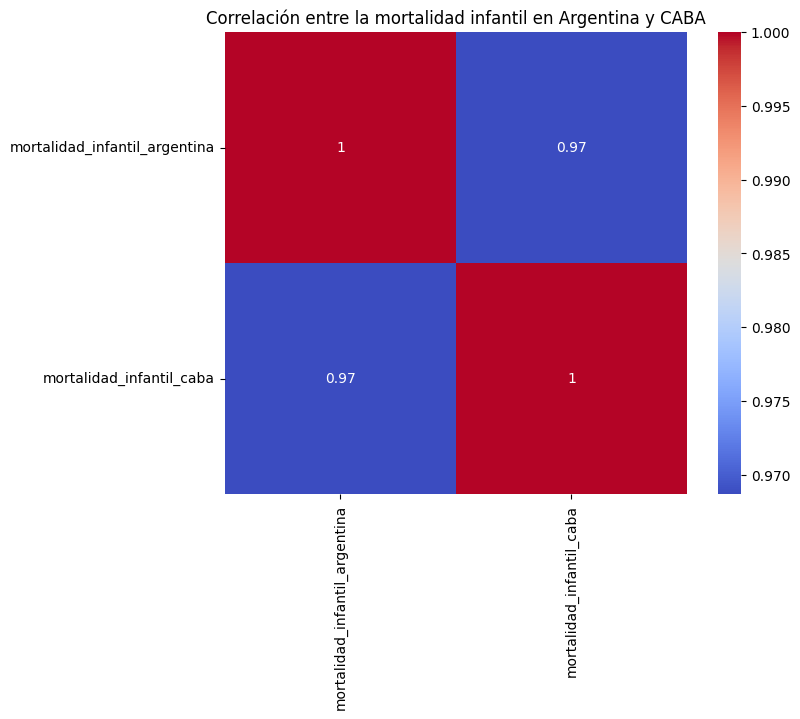

In [17]:
df_relaciones = data[['mortalidad_infantil_argentina','mortalidad_infantil_caba']]
corr_matrix = df_relaciones.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlación entre la mortalidad infantil en Argentina y CABA")
plt.show()


existe una correlación positiva muy fuerte entre la mortalidad infantil en Argentina y la mortalidad infantil en la Ciudad Autónoma de Buenos Aires (CABA). Esto sugiere que cuando la mortalidad infantil en Argentina aumenta, es probable que la mortalidad infantil en CABA también aumente, y viceversa.



Como evoluciono la mortalidad en agentina en niños?

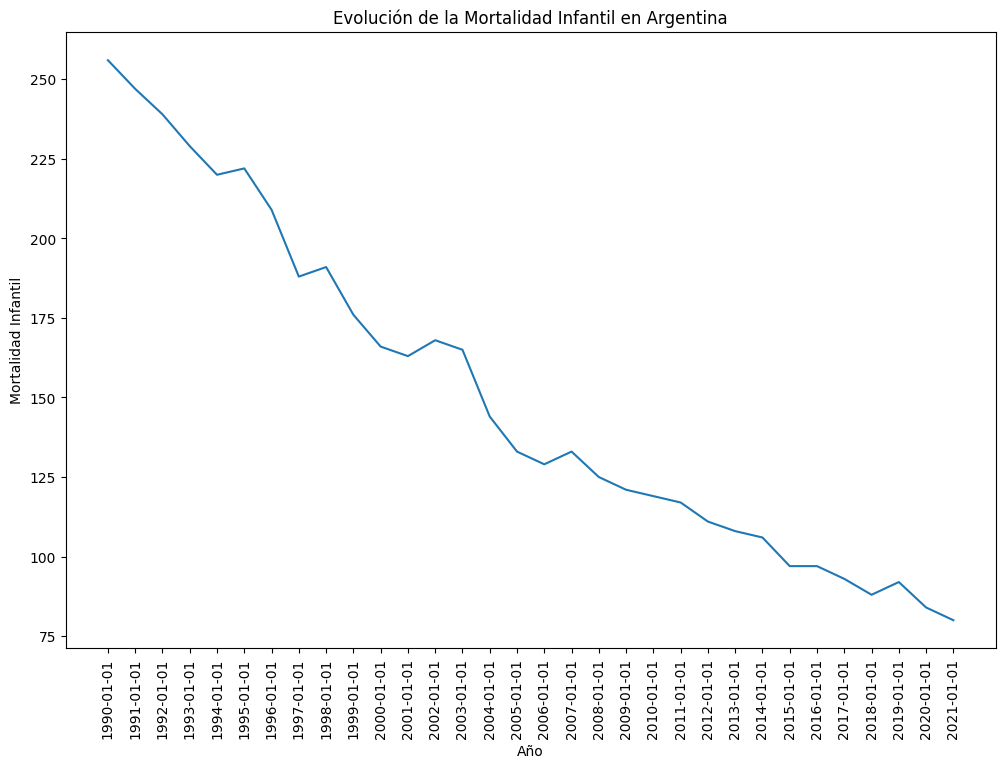

In [34]:
tiempo = data['indice_tiempo']
mortalidad_infantil_argentina = data['mortalidad_infantil_argentina']

plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura

# Crear el gráfico de línea
plt.plot(tiempo, mortalidad_infantil_argentina)

# Personalizar los ejes y el título del gráfico
plt.xlabel('Año')
plt.ylabel('Mortalidad Infantil')
plt.title('Evolución de la Mortalidad Infantil en Argentina')
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()


Una tendencia bajista indica una disminución gradual en los valores de la variable a medida que transcurre el tiempo. En el caso de la mortalidad infantil, una tendencia bajista implica que a lo largo de los años se han implementado políticas, programas de salud y mejoras en la atención médica que han contribuido a reducir la tasa de mortalidad infantil en Argentina.

¿Cuál es la distribución de la mortalidad infantil el las provincias de **Santa fe**, **Cordoba**, **Buenos aires** y **CABA** a lo largo del tiempo?

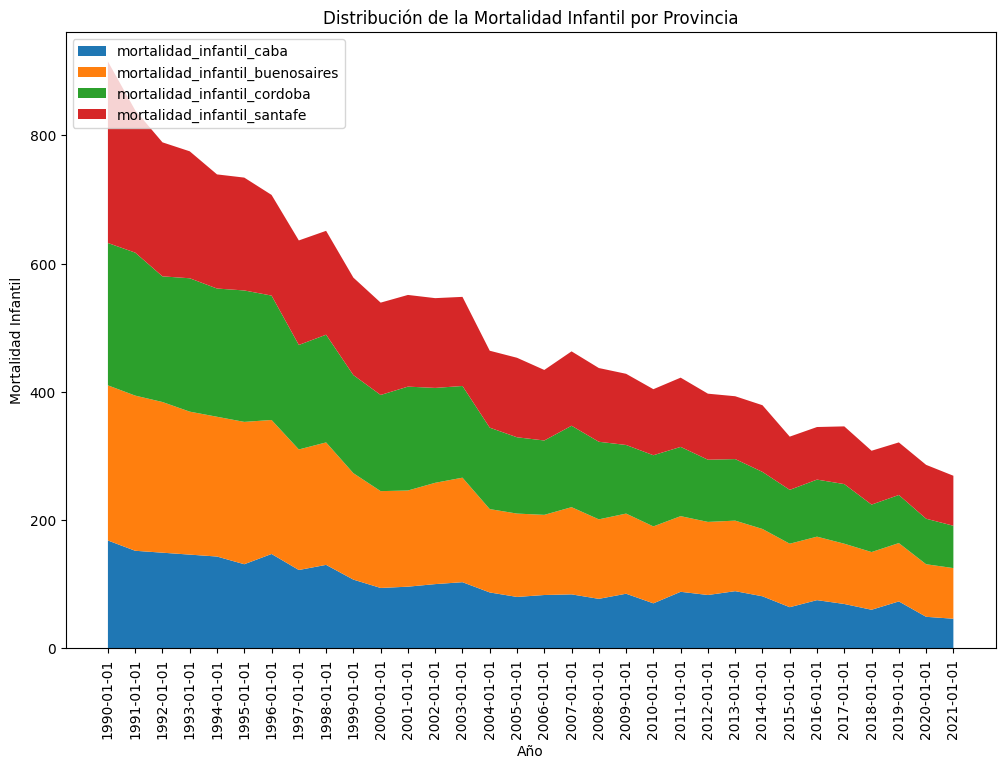

In [40]:
provincias = ['mortalidad_infantil_caba', 'mortalidad_infantil_buenosaires', 'mortalidad_infantil_cordoba', 'mortalidad_infantil_santafe']  # Puedes agregar más provincias aquí
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.stackplot(data['indice_tiempo'], data[provincias].T.values, labels=provincias)
plt.xlabel('Año')
plt.ylabel('Mortalidad Infantil')
plt.title('Distribución de la Mortalidad Infantil por Provincia')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

Podemos observar que en estas provincias hay una tendencia a la baja en la mortalidad infantil a lo largo del tiempo. Es notable que la provincia de Santa Fe experimenta una disminución abrupta en el período de 1990 a 1996.

¿Cuáles son las provincias con la mayor y la menor tasa de mortalidad infantil a lo largo del tiempo?

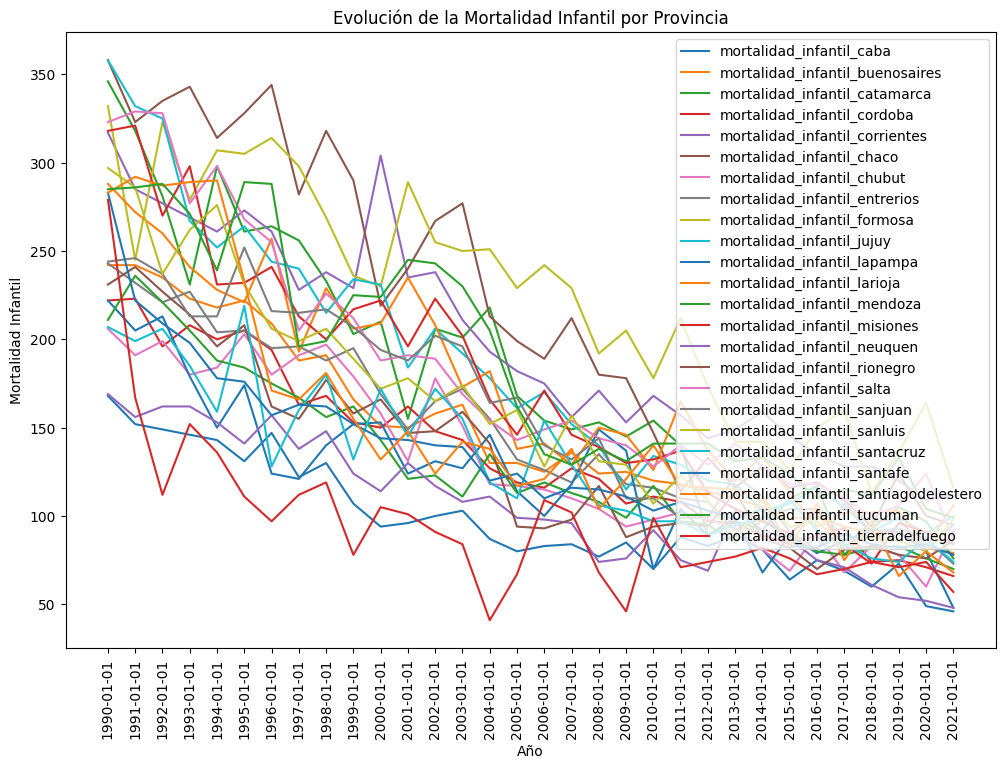

In [47]:
provincias = data.columns[2:]

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de líneas para todas las provincias
for provincia in provincias:
    plt.plot(data['indice_tiempo'], data[provincia], label=provincia)

# Personalizar los ejes y el título del gráfico
plt.xlabel('Año')
plt.ylabel('Mortalidad Infantil')
plt.title('Evolución de la Mortalidad Infantil por Provincia')
plt.legend()
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

En general, se observa una disminución año tras año en la mortalidad infantil en todas las provincias. En algunas provincias, esta disminución es más pronunciada y notable que en otras. Aunque existen fluctuaciones en algunas provincias, en general se ha producido una mejora significativa en los índices de mortalidad infantil a lo largo del tiempo.

In [56]:
# Calcular el porcentaje de disminución por provincia
porcentaje_disminucion = {}
for provincia in provincias:
    primer_valor = data[provincia].iloc[0]
    ultimo_valor = data[provincia].iloc[-1]
    porcentaje = abs((ultimo_valor - primer_valor) / primer_valor) * 100
    porcentaje_disminucion[provincia] = porcentaje
# Convertir el diccionario en un DataFrame
df_porcentaje_disminucion = pd.DataFrame.from_dict(porcentaje_disminucion, orient='index', columns=['Porcentaje de Disminución'])
# Ordenar el DataFrame por el porcentaje de disminución
df_porcentaje_disminucion = df_porcentaje_disminucion.sort_values('Porcentaje de Disminución', ascending=False)
# Mostrar el DataFrame
print(df_porcentaje_disminucion)

                                       Porcentaje de Disminución
mortalidad_infantil_tierradelfuego                     79.569892
mortalidad_infantil_lapampa                            78.378378
mortalidad_infantil_catamarca                          78.034682
mortalidad_infantil_santiagodelestero                  75.971731
mortalidad_infantil_misiones                           73.584906
mortalidad_infantil_chaco                              73.463687
mortalidad_infantil_salta                              73.065015
mortalidad_infantil_caba                               72.619048
mortalidad_infantil_santafe                            72.438163
mortalidad_infantil_jujuy                              72.067039
mortalidad_infantil_neuquen                            71.597633
mortalidad_infantil_cordoba                            70.270270
mortalidad_infantil_sanjuan                            70.081967
mortalidad_infantil_buenosaires                        67.355372
mortalidad_infantil_sanlu

Observando los porcentajes de disminución de la mortalidad infantil en las diferentes provincias, se puede notar que Tierra del Fuego presenta la mayor disminución con un porcentaje del 79.57%, seguida de La Pampa con un 78.38% y Catamarca con un 78.03%. Por otro lado, Chubut muestra la menor disminución con un porcentaje del 55.34%.

Estos porcentajes de disminución pueden servir como punto de partida para plantear regresiones lineales con el objetivo de analizar la relación entre el tiempo y la mortalidad infantil en cada provincia. Se puede explorar si existe una tendencia lineal significativa en la disminución de la mortalidad infantil a lo largo del tiempo, y en caso afirmativo, realizar proyecciones futuras.

# Predicciones:

Coeficiente de Determinación (R²): 0.9555172014857661
Error Cuadrático Medio (MSE): 122.69189882697847
Error Absoluto Medio (MAE): 9.377474340175922
Predicción de mortalidad infantil para el próximo año: 47.637829912024245
Año en el cual las muertes infantiles van a ser 0: 2034


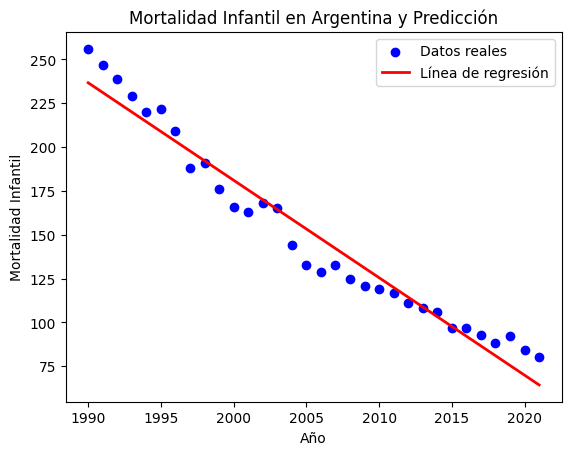

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data['indice_tiempo'] = pd.to_datetime(data['indice_tiempo'])
# Obtener variables independientes (años) y variable dependiente (mortalidad infantil en Argentina)
X = data['indice_tiempo'].dt.year.values.reshape(-1, 1)
y = data['mortalidad_infantil_argentina']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Calcular las predicciones del modelo
y_pred = model.predict(X)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y, y_pred)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y, y_pred)

# Predecir la mortalidad infantil para el próximo año
next_year = np.array([[2024]])
predicted_mortality = model.predict(next_year)

# Imprimir las métricas de evaluación
print(f"Coeficiente de Determinación (R²): {r2}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Predicción de mortalidad infantil para el próximo año: {predicted_mortality[0]}")
print(f"Año en el cual las muertes infantiles van a ser 0: {zero_mortality_year}")
# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Año')
plt.ylabel('Mortalidad Infantil')
plt.title('Mortalidad Infantil en Argentina y Predicción')
plt.legend()
plt.show()
zero_mortality_year = int(round((0 - model.intercept_) / model.coef_[0]))


  El coeficiente de determinación (R²) es 0.956, lo cual indica que aproximadamente el 95.6% de la variabilidad de la mortalidad infantil en Argentina puede ser explicada por el modelo de regresión lineal utilizado. Esto sugiere que el modelo tiene un buen ajuste a los datos y puede proporcionar una estimación confiable de la mortalidad infantil.

  El Error Cuadrático Medio (MSE) es 122.69 y el Error Absoluto Medio (MAE) es 9.38. Estos valores representan las diferencias promedio entre las predicciones del modelo y los valores reales de mortalidad infantil. En general, los valores son relativamente bajos, lo que indica que el modelo tiende a hacer predicciones cercanas a los valores reales, pero aún existen discrepancias.

  La predicción para el próximo año es de 47.64 para la mortalidad infantil en Argentina. Sin embargo, es importante tener en cuenta que las predicciones futuras siempre tienen cierto grado de incertidumbre y están sujetas a cambios debido a diversas variables y factores desconocidos.

Coeficiente de Determinación (R²): 0.8552143308216311
Error Cuadrático Medio (MSE): 321.35278248717526
Error Absoluto Medio (MAE): 12.397234695748011
Predicción de mortalidad infantil en Santa Fe para el próximo año: 45.86107038123191
Año estimado en el que la mortalidad infantil en Santa Fe podría llegar a cero: 2034


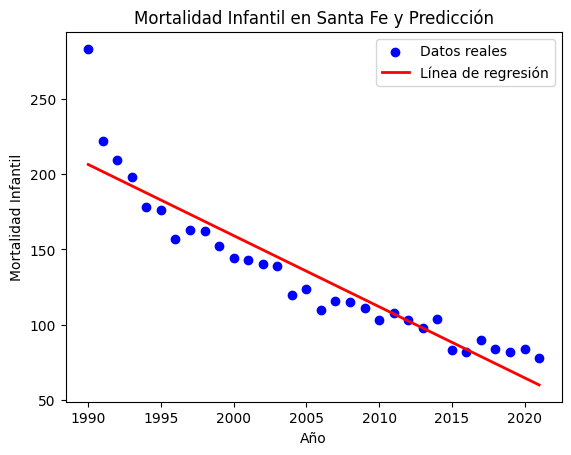

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data['indice_tiempo'] = pd.to_datetime(data['indice_tiempo'])
# Obtener variables independientes (años) y variable dependiente (mortalidad infantil en Santa Fe)
X = data['indice_tiempo'].dt.year.values.reshape(-1, 1)
y = data['mortalidad_infantil_santafe']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)
# Calcular las predicciones del modelo
y_pred = model.predict(X)
# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y, y_pred)
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y, y_pred)
# Predecir la mortalidad infantil para el próximo año
next_year = np.array([[2024]])
predicted_mortality = model.predict(next_year)
# Calcular el año en el cual la mortalidad infantil en Santa Fe podría llegar a cero
zero_mortality_year = int(round((0 - model.intercept_) / model.coef_[0]))
# Imprimir las métricas de evaluación
print(f"Coeficiente de Determinación (R²): {r2}")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Predicción de mortalidad infantil en Santa Fe para el próximo año: {predicted_mortality[0]}")
print(f"Año estimado en el que la mortalidad infantil en Santa Fe podría llegar a cero: {zero_mortality_year}")
# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Año')
plt.ylabel('Mortalidad Infantil')
plt.title('Mortalidad Infantil en Santa Fe y Predicción')
plt.legend()
plt.show()

# **Conclusión**:

A pesar de la complejidad y limitaciones del dataset utilizado, nos complace destacar que los resultados obtenidos revelan una tendencia alentadora en cuanto a la mortalidad infantil en Argentina. A través del análisis realizado, hemos observado que la tendencia general muestra un descenso en los índices de mortalidad infantil a lo largo del tiempo.

Estos resultados nos llenan de esperanza, ya que indican que se están implementando medidas efectivas para mejorar la salud y el bienestar de los niños en el país. A medida que los años avanzan, se vislumbra la posibilidad de que los casos de mortalidad infantil se reduzcan significativamente e incluso se aproximen a cifras cercanas a cero.

Sin embargo, es importante tener en cuenta que este progreso no se logra de la noche a la mañana y requiere de un enfoque continuo en políticas y acciones destinadas a mejorar la atención médica, promover la prevención de enfermedades y garantizar el acceso equitativo a los servicios de salud para todos los niños.

En resumen, aunque el dataset utilizado presenta ciertas limitaciones, los resultados obtenidos nos brindan motivos para celebrar, ya que indican una tendencia descendente en la mortalidad infantil en Argentina. Estos hallazgos nos impulsan a seguir trabajando arduamente para continuar disminuyendo estas cifras y garantizar un futuro más saludable para las generaciones venideras.